# **Exploratory Data Analysis of cars dataset**



Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

# **Step 1**

# **1.1 importing the required libraries and loading the Data**

In [60]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns                     
data=pd.read_csv("data.csv",delimiter=",")

In [61]:
data.head()#looking at the first 5 rows

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# **1.2 Checking the datatype**

> This step is essential cause at time we might have to change the datatype of  some columns for ploting graphs and doing statistical analysis .




In [62]:
data.dtypes #to know the datatype of DataFrame

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

# **1.3 Summary statistics ,shape and null values**

In [63]:
data.describe() #The describe() function in pandas is very handy in getting various summary statistics.This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [64]:
data.info() #prints information about the dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [65]:
data.isnull().sum() #column wise sum of missing values

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

# **Step 2. Dropping irrelevant columns**


In [66]:
#Dropping enginer fuel type and number of doors as they are of less relevenace in this dataset.
data.drop(['Engine Fuel Type','Number of Doors'],axis=1,inplace=True)
data.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Luxury,Compact,Convertible,28,18,3916,34500


# **Step 3. Renaming the columns**

> Renaming of the columns is done to improve the readability of the dataset.



In [67]:
data.rename(columns={ "Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"},inplace=True)
data.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Market Category,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Luxury,Compact,Convertible,28,18,3916,34500


# **Step 4**

# **4.1 Handling duplicates**

In [68]:
data.duplicated().sum() #to get the number of dumplicates present in the dataset.

716

In [69]:
data.loc[data.duplicated(),:] #duplactes in the data set

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Market Category,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
14,BMW,1 Series,2013,230.0,6.0,MANUAL,rear wheel drive,"Luxury,Performance",Compact,Coupe,28,19,3916,31500
18,Audi,100,1992,172.0,6.0,MANUAL,front wheel drive,Luxury,Midsize,Sedan,24,17,3105,2000
20,Audi,100,1992,172.0,6.0,MANUAL,front wheel drive,Luxury,Midsize,Sedan,24,17,3105,2000
24,Audi,100,1993,172.0,6.0,MANUAL,front wheel drive,Luxury,Midsize,Sedan,24,17,3105,2000
25,Audi,100,1993,172.0,6.0,MANUAL,front wheel drive,Luxury,Midsize,Sedan,24,17,3105,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11481,Suzuki,X-90,1998,95.0,4.0,MANUAL,four wheel drive,NaN,Compact,2dr SUV,26,22,481,2000
11603,Volvo,XC60,2017,302.0,4.0,AUTOMATIC,all wheel drive,"Crossover,Luxury,Performance",Midsize,4dr SUV,29,20,870,46350
11604,Volvo,XC60,2017,240.0,4.0,AUTOMATIC,front wheel drive,"Crossover,Luxury",Midsize,4dr SUV,30,23,870,40950
11708,Suzuki,XL7,2008,252.0,6.0,AUTOMATIC,all wheel drive,Crossover,Midsize,4dr SUV,22,15,481,29149


In [70]:
data.shape

(11914, 14)

In [71]:
data.drop_duplicates(inplace=True,keep="first") #to drop the duplicates present in the dataset.

In [72]:
data.duplicated().sum() #to check if duplicates where successfully removed.

0

# **4.2 Handling null values**

In [73]:
data.isnull().sum() #column wise sum of missing values

Make                  0
Model                 0
Year                  0
HP                   69
Cylinders            30
Transmission          0
Drive Mode            0
Market Category    3375
Vehicle Size          0
Vehicle Style         0
MPG-H                 0
MPG-C                 0
Popularity            0
Price                 0
dtype: int64

In [74]:
data.drop(['Market Category'],axis=1,inplace=True) #as market category as a lot of null values it is better to drop that column. 

In [75]:
data.isnull().sum() 

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64

In [76]:
# impute the null values present in the HP and Cylinders columns with the median of the respective column.
data["HP"].fillna(data["HP"].median(),inplace=True)
data["Cylinders"].fillna(data["Cylinders"].median(),inplace=True)

In [77]:
data.info() # to get info of the dataset and to make sure no null values are present in the dataset.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11198 entries, 0 to 11913
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           11198 non-null  object 
 1   Model          11198 non-null  object 
 2   Year           11198 non-null  int64  
 3   HP             11198 non-null  float64
 4   Cylinders      11198 non-null  float64
 5   Transmission   11198 non-null  object 
 6   Drive Mode     11198 non-null  object 
 7   Vehicle Size   11198 non-null  object 
 8   Vehicle Style  11198 non-null  object 
 9   MPG-H          11198 non-null  int64  
 10  MPG-C          11198 non-null  int64  
 11  Popularity     11198 non-null  int64  
 12  Price          11198 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.2+ MB


# **Step 5. Checking for outliers**


>Outliers are data points that are far from other data points. In other words, they’re unusual values in a dataset. Outliers are problematic for many statistical analyses because they can cause tests to either miss significant findings or distort real results.




# **5.1 plotting graphs to identify the outliers**


> plotting graphs is a great way to identify the outliers



(0.0, 1.0, 0.0, 1.0)

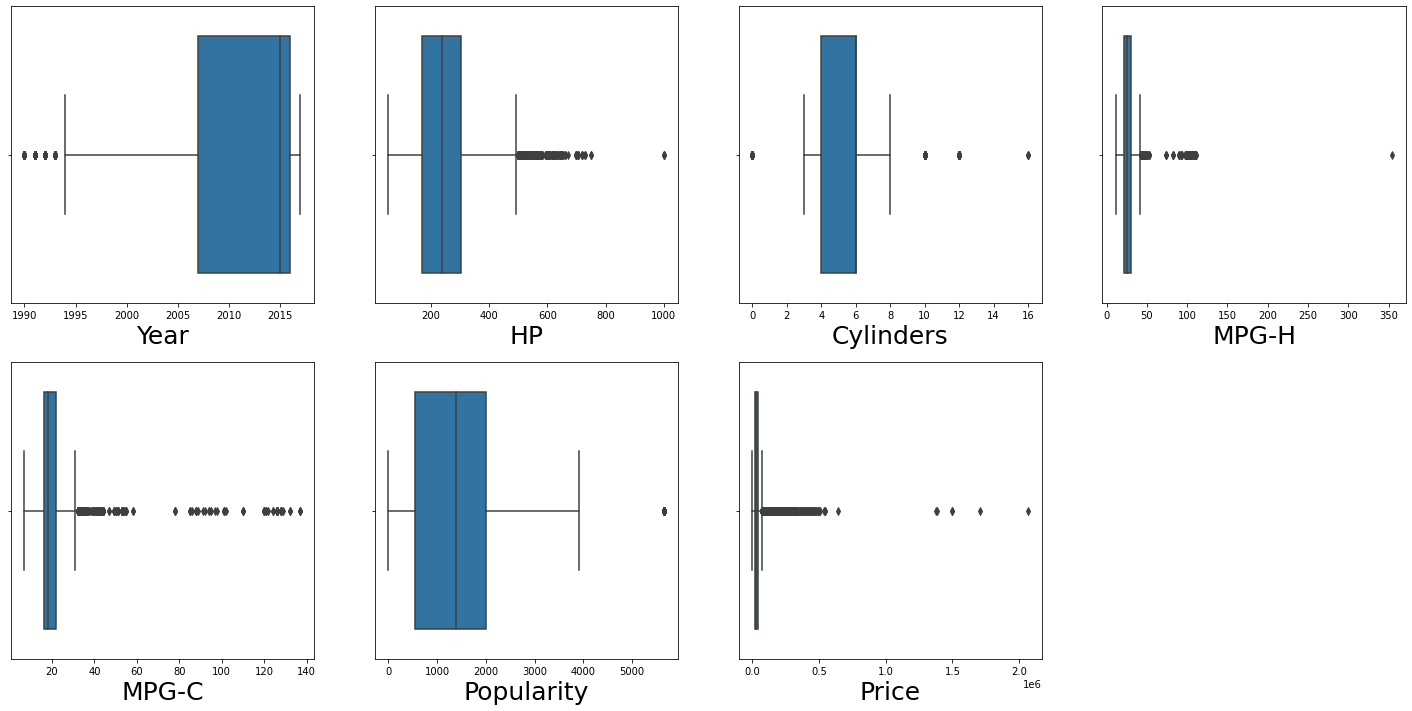

In [78]:
fig, axes =plt.subplots(2,4,figsize=(25,12))
ax= sns.boxplot(x="Year",data=data,ax=axes[0,0])
ax.set_xlabel("Year",fontsize=25)
ax= sns.boxplot(x="HP",data=data,ax=axes[0,1])
ax.set_xlabel("HP",fontsize=25)
ax= sns.boxplot(x="Cylinders",data=data,ax=axes[0,2])
ax.set_xlabel("Cylinders",fontsize=25)
ax= sns.boxplot(x="MPG-H",data=data,ax=axes[0,3])
ax.set_xlabel("MPG-H",fontsize=25)
ax= sns.boxplot(x="MPG-C",data=data,ax=axes[1,0])
ax.set_xlabel("MPG-C",fontsize=25)
ax= sns.boxplot(x="Popularity",data=data,ax=axes[1,1])
ax.set_xlabel("Popularity",fontsize=25)
ax= sns.boxplot(x="Price",data=data,ax=axes[1,2])
ax.set_xlabel("Price",fontsize=25)
axes[-1, -1].axis('off')

Text(0.5, 0, 'Year')

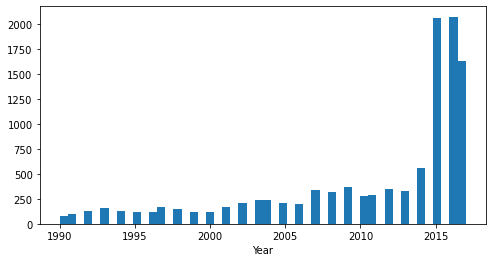

In [79]:
plt.hist(data["Year"],bins=50)
plt.xlabel('Year')

Text(0.5, 0, 'Price')

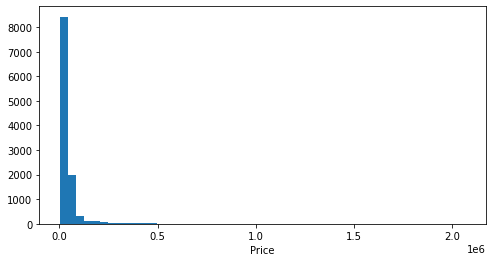

In [80]:
plt.hist(data["Price"],bins=50)
plt.xlabel('Price')

Text(0.5, 0, 'HP')

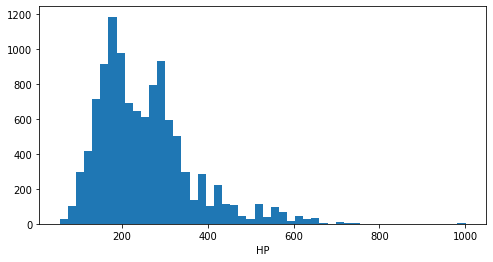

In [81]:
plt.hist(data["HP"],bins=50)
plt.xlabel('HP')

Text(0.5, 0, 'MPG-h')

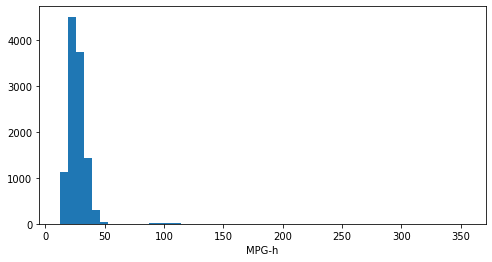

In [82]:
plt.hist(data["MPG-H"],bins=50)
plt.xlabel('MPG-h')

Text(0, 0.5, 'Year')

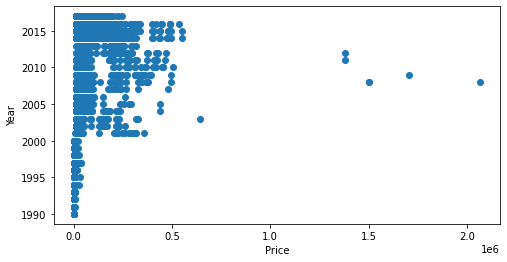

In [83]:
plt.scatter(data["Price"],data["Year"])
plt.xlabel("Price")
plt.ylabel("Year")

# **5.2 getting rid of outliers**

>there are many ways to get rid of outliers .for this data set i have used the IQR method . 
The interquartile range (IQR) is a measure of variability, based on dividing a data set into quartiles. Quartiles divide a rank-ordered data set into four equal parts. The values that divide each part are called the first, second, and third quartiles; and they are denoted by Q1, Q2, and Q3, respectively.




In [84]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1 #to get the interquartile range
print(IQR)

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21433.75
dtype: float64


In [85]:
#getting rid of the data that falls outside the inter quartile range 
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

(0.0, 1.0, 0.0, 1.0)

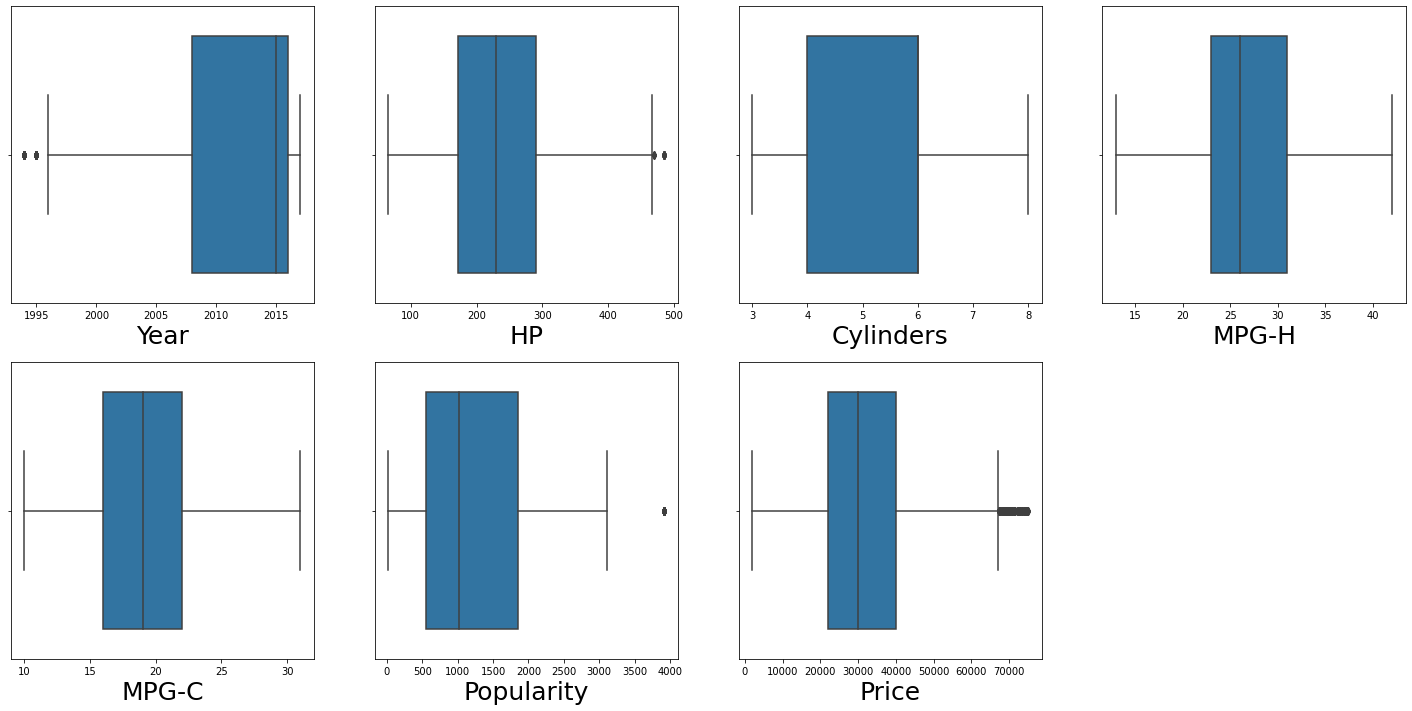

In [86]:
#to make sure outliers were removed
fig, axes =plt.subplots(2,4,figsize=(25,12))
ax= sns.boxplot(x="Year",data=data,ax=axes[0,0])
ax.set_xlabel("Year",fontsize=25)
ax= sns.boxplot(x="HP",data=data,ax=axes[0,1])
ax.set_xlabel("HP",fontsize=25)
ax= sns.boxplot(x="Cylinders",data=data,ax=axes[0,2])
ax.set_xlabel("Cylinders",fontsize=25)
ax= sns.boxplot(x="MPG-H",data=data,ax=axes[0,3])
ax.set_xlabel("MPG-H",fontsize=25)
ax= sns.boxplot(x="MPG-C",data=data,ax=axes[1,0])
ax.set_xlabel("MPG-C",fontsize=25)
ax= sns.boxplot(x="Popularity",data=data,ax=axes[1,1])
ax.set_xlabel("Popularity",fontsize=25)
ax= sns.boxplot(x="Price",data=data,ax=axes[1,2])
ax.set_xlabel("Price",fontsize=25)
axes[-1, -1].axis('off')

# **step 6. Most represented car and the average price among them.**

In [87]:
cars =data['Make'].value_counts(ascending=False)
others=cars[16:].sum()
cars[16]=others
print(cars[:10])# to print the top 10 car brands

Chevrolet     1033
Toyota         632
Volkswagen     515
Nissan         513
GMC            469
Dodge          425
Mazda          397
Honda          373
Suzuki         339
Infiniti       322
Name: Make, dtype: int64


Text(0.5, 1.0, 'Market share of Car Brands')

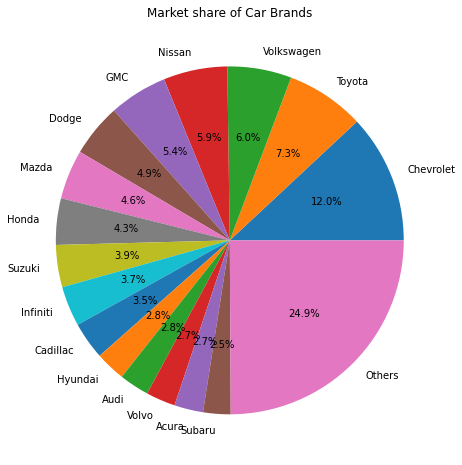

In [88]:
labels=['Chevrolet', 'Toyota', 'Volkswagen', 'Nissan', 'GMC', 'Dodge', 'Mazda',
       'Honda', 'Suzuki', 'Infiniti', 'Cadillac', 'Hyundai', 'Audi', 'Volvo',
       'Acura','Subaru','Others']
size=cars[:17]
plt.figure(figsize=(12,8))
plt.pie(size,labels=labels,autopct="%.1f%%",)
plt.title("Market share of Car Brands")

Text(0.5, 1.0, 'No of units sold by top car brands')

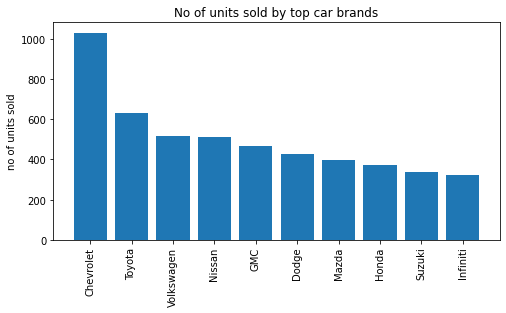

In [89]:
plt.bar(data['Make'].value_counts(ascending=False).index[:10],data['Make'].value_counts(ascending=False)[:10])
plt.xticks(rotation=90)
plt.ylabel("no of units sold")
plt.title("No of units sold by top car brands")



>**Chevrolet sold the most number of cars**



In [90]:
avg_price=data[['Make','Price']].loc[(data['Make'] == 'Chevrolet')|(data['Make'] == 'Toyota')|(data['Make'] == 'Volkswagen')|(data['Make'] == 'Nissan')|(data['Make'] == 'GMC')|
               (data['Make'] == 'Dodge')|(data['Make'] == 'Mazda')|(data['Make'] == 'Honda')|(data['Make'] == 'Suzuki')|(data['Make'] == 'Infiniti')].groupby('Make').mean()
print(avg_price) #to print average price among the top car brands

                   Price
Make                    
Chevrolet   28207.045499
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Infiniti    43127.822981
Mazda       20830.670025
Nissan      28352.543860
Suzuki      18168.241888
Toyota      29022.944620
Volkswagen  29032.817476


# **Step 7.Ploting the correlation matrix and documenting insights.**


> A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.



In [91]:
data.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.330149,-0.094681,0.359909,0.323769,0.204623,0.592454
HP,0.330149,1.000000,0.740236,-0.464657,-0.562367,0.105946,0.742258
Cylinders,-0.094681,0.740236,1.000000,-0.697938,-0.750932,0.024855,0.391229
MPG-H,0.359909,-0.464657,-0.697938,1.000000,0.937947,0.082208,-0.127228
MPG-C,0.323769,-0.562367,-0.750932,0.937947,1.000000,0.071914,-0.201766
Popularity,0.204623,0.105946,0.024855,0.082208,0.071914,1.000000,0.115512
Price,0.592454,0.742258,0.391229,-0.127228,-0.201766,0.115512,1.000000


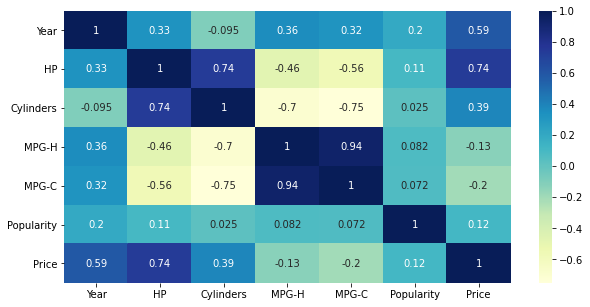

In [92]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),cmap="YlGnBu",annot=True)

# **Highly Positively Correlated**
> **Clyinders and HP**
> higher the number of cyclinders higher will be the horse power.

>**Highway mpg and City mpg**
> higher the h-mpg higher will be the c-mpg.

# **Not Correlated** 
there is very little association between these features
>**Highway mpg and Popularity**

>**City mpg and Popularity**

>**Cylinders and Popularity**

# **Highly Negatively  Correlated** 
> **MPG and Clyinders**
> higher the number of cyclinders lesser will be the MPG.

> **MPG and HP**
> higher the number of Power lesser will be the MPG.










# **Step 8. Exploratory Data Analysis**

Text(0.5, 1.0, 'Market share of Transimission Type')

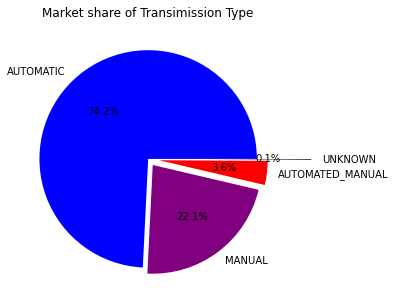

In [93]:
labels=["AUTOMATIC","MANUAL","AUTOMATED_MANUAL","UNKNOWN"]    
size=data["Transmission"].value_counts(ascending=False)
explode=[0,0.07,0.1,0.5]
colors=["blue","purple","red","black"]
plt.figure(figsize=(9,5))
plt.pie(size,labels=labels,autopct="%.1f%%",explode=explode,colors=colors)
plt.title("Market share of Transimission Type")



> **Most people prefer an automatic transmission car over other types.**



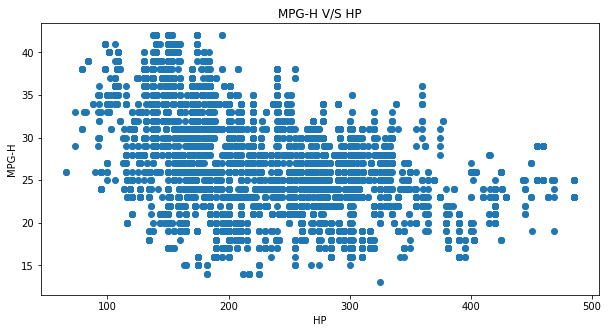

In [94]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(data['HP'], data['MPG-H'])
ax.set_xlabel("HP")
ax.set_ylabel('MPG-H')
plt.title("MPG-H V/S HP")
plt.show()



>**As the power increase the MPG decreases.**



Text(0.5, 1.0, 'No of units sold per Vehicle Style')

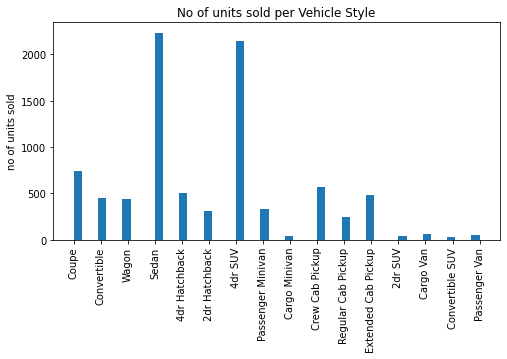

In [95]:
plt.hist(data["Vehicle Style"],bins=50)
plt.xticks(rotation=90)
plt.ylabel("no of units sold")
plt.title("No of units sold per Vehicle Style")



> **Sedan was the most sold vehicle style.**



Text(0.5, 1.0, 'No of units sold over the Years')

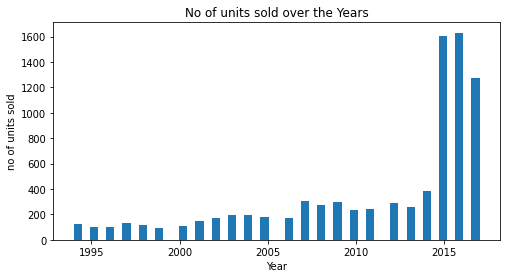

In [96]:
plt.hist(data["Year"],bins=50)
plt.xlabel("Year")
plt.ylabel("no of units sold")
plt.title("No of units sold over the Years")


> **In the year 2015 there was a sudden spike in car sales.**




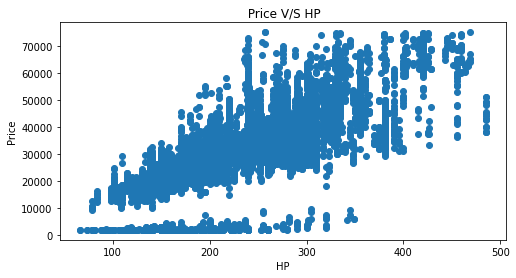

In [97]:
plt.scatter(data['HP'], data['Price'])
plt.xlabel('HP')
plt.ylabel('Price')
plt.title(" Price V/S HP")
plt.show()

> **as power increases, price also increases.**

Text(0.5, 1.0, 'Year V/S Transmission Type')

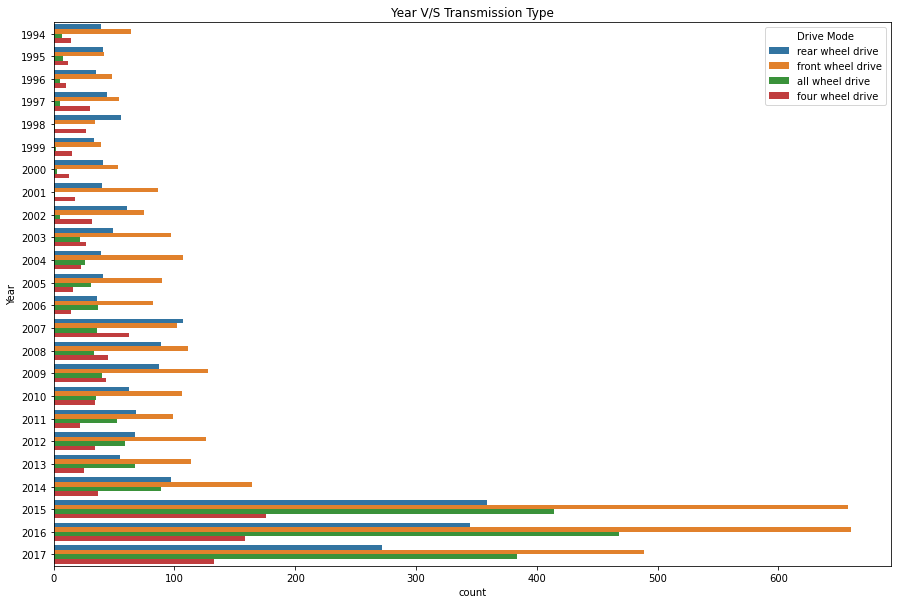

In [98]:
plt.rcParams["figure.figsize"] = (15,10)
ax=sns.countplot(y="Year", data=data,hue ="Drive Mode")
plt.title("Year V/S Transmission Type")


> **Front wheel drive is bought the most**




Text(0.5, 1.0, 'Year V/S Transmission Type')

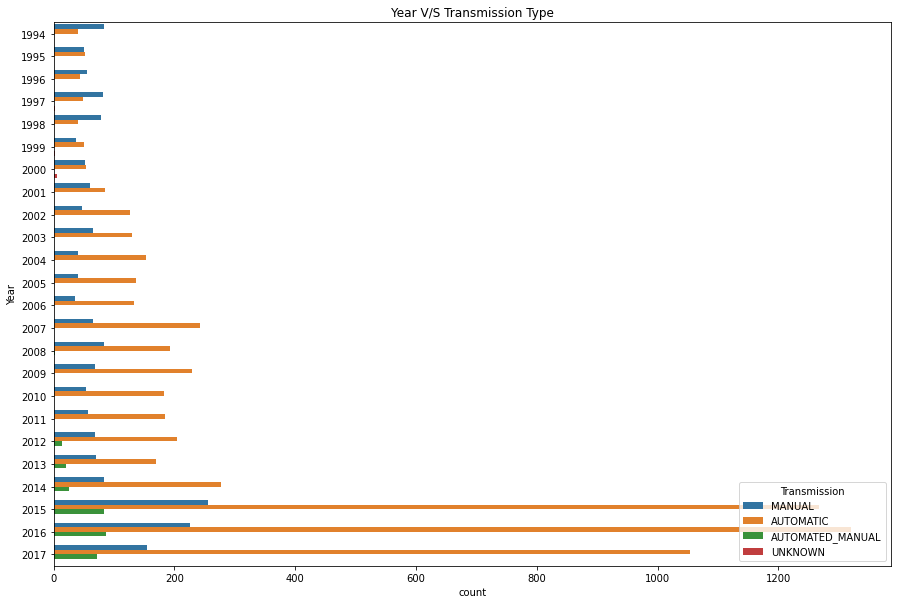

In [99]:
plt.rcParams["figure.figsize"] = (15,10)
ax=sns.countplot(y="Year", data=data,hue ="Transmission")
plt.title("Year V/S Transmission Type")



> **In the 21st century Automatic trasmission became the most preferred transmission type.**



Text(0.5, 1.0, 'Vehicle Style V/S Transmission')

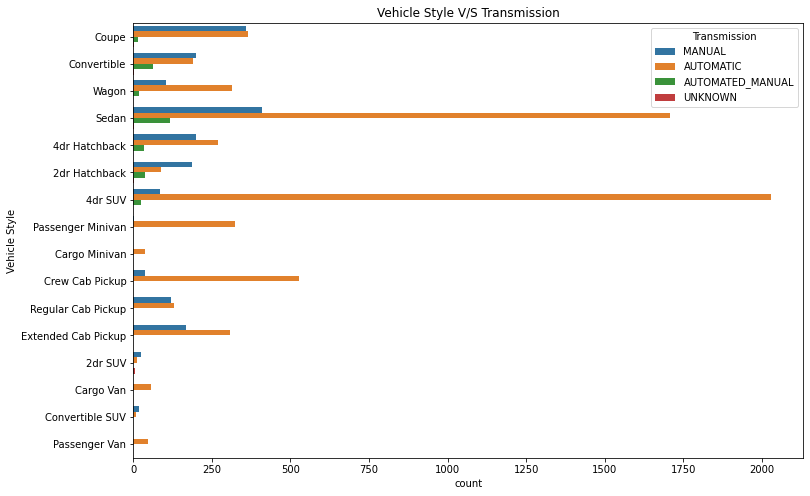

In [100]:
plt.rcParams["figure.figsize"] = (12,8)
ax=sns.countplot(y="Vehicle Style", data=data,hue ="Transmission")
plt.title("Vehicle Style V/S Transmission")

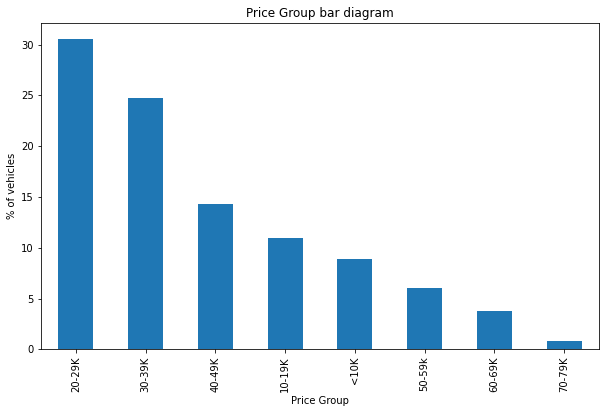

In [101]:
data['price_grp'] = pd.cut(data['Price'],[0,10000,20000,30000,40000,50000,60000,70000,80000], 
              labels = ['<10K','10-19K','20-29K','30-39K','40-49K','50-59k','60-69K','70-79K'], include_lowest = True)
data['price_grp'] = data['price_grp'].astype(object)
(data['price_grp'].value_counts() / len(data) *100).plot.bar(figsize=(10,6))
plt.title("Price Group bar diagram")
plt.ylabel('% of vehicles')
plt.xlabel('Price Group');

# **Step 9. building a machine learning model**

In [102]:
plt.rcParams["figure.figsize"] = (8,4)  
abc=data.copy()

In [103]:
abc.drop(["Model","Price","price_grp"],axis=1,inplace=True)

In [104]:
abc=pd.get_dummies(abc,drop_first=True) #to conver categorical varibles .
x=abc.iloc[:,:-1].values
y = data['Price'].values.reshape(-1,1)

In [105]:
# Feature Scaling (Feature scaling is a method used to normalize the range of independent variables or features of data.)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(x)
y = sc_y.fit_transform(y.reshape(-1,1))

In [106]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

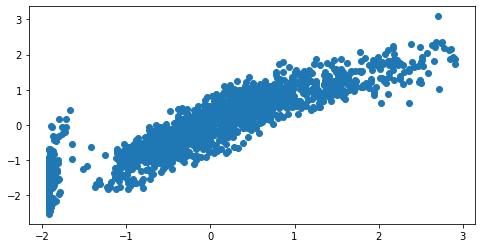

In [107]:
#using linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

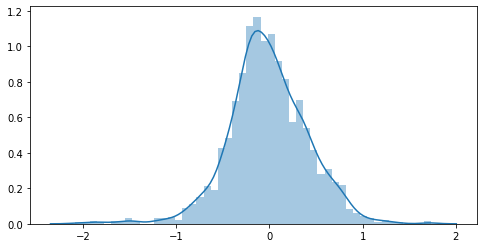

In [108]:
sns.distplot((y_test-y_pred),bins=50)

In [109]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn import metrics
import math
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
print("Root Mean Square Error:",math.sqrt(mean_squared_error(y_test,y_pred)))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print("R2 Score :",r2_score(y_test,y_pred))

Mean Squared Error: 0.1804578507029857
Root Mean Square Error: 0.4248033082533441
Mean Absolute Error: 0.3221427729586577
R2 Score : 0.815987741804256


**Linear regression gave a r2 score of 0.815987741804256**

# **Step 10. trying different algorithms**

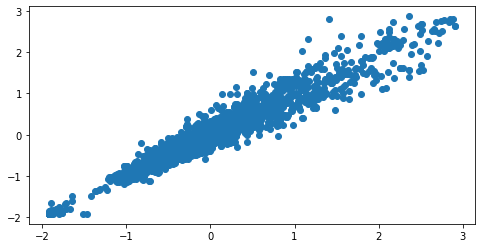

In [110]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

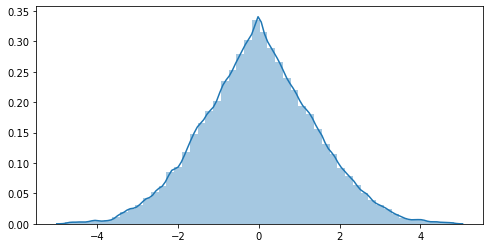

In [111]:
sns.distplot((y_test-y_pred),bins=50)

In [114]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn import metrics
import math
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
print("Root Mean Square Error:",math.sqrt(mean_squared_error(y_test,y_pred)))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print("R2 Score :",r2_score(y_test,y_pred))

Mean Squared Error: 0.05144206376305216
Root Mean Square Error: 0.22680842965606934
Mean Absolute Error: 0.16451714512664892
R2 Score : 0.9475447020874218


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


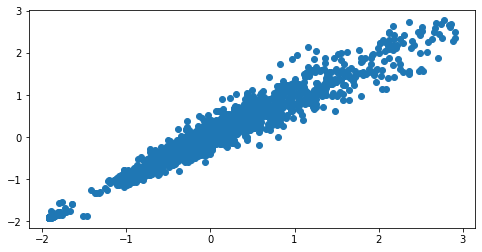

In [115]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 150, random_state =0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

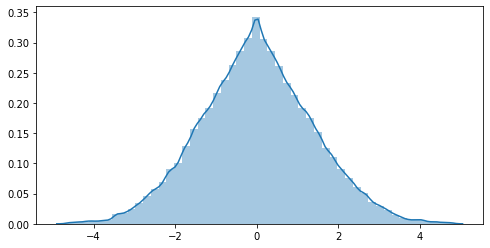

In [116]:
sns.distplot((y_test-y_pred),bins=50)

In [117]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn import metrics
import math
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
print("Root Mean Square Error:",math.sqrt(mean_squared_error(y_test,y_pred)))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print("R2 Score :",r2_score(y_test,y_pred))

Mean Squared Error: 0.05144206376305216
Root Mean Square Error: 0.22680842965606934
Mean Absolute Error: 0.16451714512664892
R2 Score : 0.9475447020874218


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


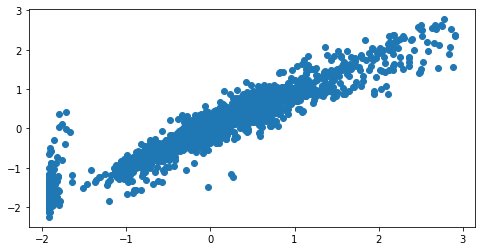

In [118]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

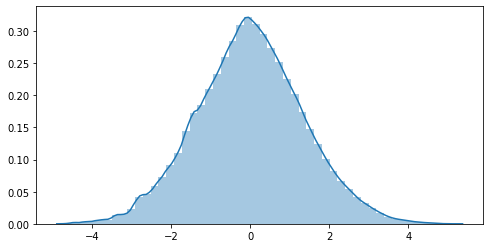

In [119]:
sns.distplot((y_test-y_pred),bins=50)

In [120]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn import metrics
import math
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
print("Root Mean Square Error:",math.sqrt(mean_squared_error(y_test,y_pred)))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print("R2 Score :",r2_score(y_test,y_pred))

Mean Squared Error: 0.09938957140050514
Root Mean Square Error: 0.3152611162203565
Mean Absolute Error: 0.21617700702137158
R2 Score : 0.8986527912015552


**Random forest Regression and Decision tree Regression worked the best among the different algorithms that were used.**
they gave  R squared score of 0.9475447020874218 and 0.940507494020174 respectively with low root mean square error and mean absolute error values. 